In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [45]:
def show_image(img, ax, title=""):
    # since plt and cv2 have different RGB sorting
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(title)

## Images

Denote a image (matrix of integer values) as $I$  
For gray-scale images, $I_{m\times n}$; where $I(i,j)$ is called intensity  
For color images, $I_{m\times n\times \{1,2,3\}}$, 3 for RGB values

Alternatively, think of a grayscale image as a mapping $I:\mathbb N^2 \rightarrow \{0,1,...,255\}$, i.e. position $(i,j)\rightarrow$ gray-scale, where 0 is black, 255 is white

__Example__
For image $I(i,j)$; $I(i,j)+50$ lighten the image, $I(i,-j)$ rotate the image horizontally

In [ ]:
# load as gray scale
img = cv2.imread("./yurina.jpg", cv2.IMREAD_GRAYSCALE)
# load as colored
img_rgb = cv2.imread("./yurina.jpg")

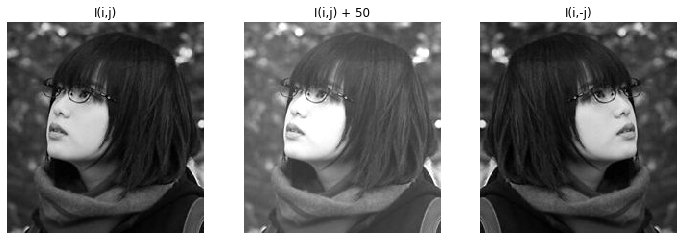

In [68]:
img1 = cv2.add(img, 50)
img2 = cv2.flip(img, 1)

fig, axs = plt.subplots(1, 3, figsize = (12, 4))
show_image(img, axs[0], "I(i,j)")
show_image(img1, axs[1], "I(i,j) + 50")
show_image(img2, axs[2], "I(i,-j)")

## Image filters
Modify the pixels in an image based on some function of a local neighborhood of each pixel  

Can be used to enhance (denoise), detect patterns (matching), extract information (texture, edges)


### Moving Averaging filter
Simplest thing is to replace each pixel by the __average__ of its neighbors

__Assumption__ neighboring pixels are similar, and noise is independent of pixels. 

For example, the following uses $\frac{1}{9}J_{3\times 3}$ and $\frac{1}{25}J_{5\times 5}$, note that the matrix should add up to one, hence the image is normalized. 

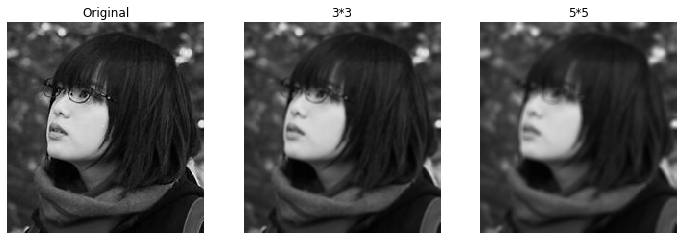

In [70]:
k_3 = np.ones((3,3),np.float32) / 9
img_3 = cv2.filter2D(img,-1,k_3)

k_5 = np.ones((5,5),np.float32) / 25
img_5 = cv2.filter2D(img,-1,k_5)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
show_image(img, axs[0], "Original")
show_image(img_3, axs[1], "3*3")
show_image(img_5, axs[2], "5*5")

#### Correlation
Given a image $I$, the filtered image is 
$$G(i,j) = (2k+1)^{-2} \sum_{u=-k}^k \sum_{v=-k}^k F(u,v)\cdot I(i+u, j + v)$$
The entries of the weight __kernel__ of __mask__ $F(u,v)$ are often called the __filter coefficients__  
Denote this operator $F\otimes I$

OpenCV `cv2.filter2d`

##### Gausian Filter for smoothing
\begin{bmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{bmatrix}

#### 